In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

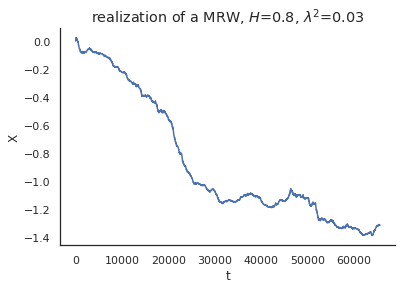

In [3]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=65536, H=0.8, lam=np.sqrt(0.03), L=65536)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [4]:
from pymultifracs.wavelet import wavelet_analysis

In [5]:
WT = wavelet_analysis(X, p_exp=2, j1=2, j2=12, weighted=True)

In [6]:
coef_boot = WT.wt_coefs.bootstrap(100, 'db3')

Using coef bootstrapping technique


In [7]:
leader_boot = WT.wt_leaders.bootstrap(100, 'db3')

Using leader bootstrapping technique


In [8]:
from importlib import reload
import pymultifracs.mfa
reload(pymultifracs.mfa)

<module 'pymultifracs.mfa' from '/home/merlin/PhD/pymultifracs/pymultifracs/mfa.py'>

In [9]:
from pymultifracs.mfa import mf_analysis, minimal_mf_analysis

In [10]:
from pymultifracs.utils import build_q_log

In [12]:
dwt_b, lwt_b = minimal_mf_analysis(coef_boot, leader_boot, j1=2, weighted=True, q=None, n_cumul=3)
dwt, lwt = minimal_mf_analysis(WT.wt_coefs, WT.wt_leaders, j1=2, weighted=True, q=None, n_cumul=3)

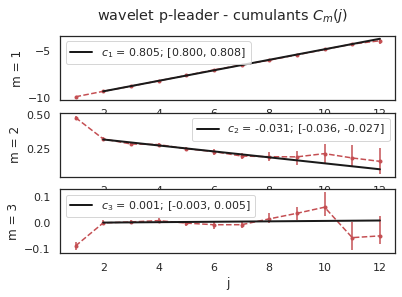

In [13]:
lwt.cumulants.plot(cm_boot=lwt_b.cumulants)

In [22]:
q = build_q_log(.1, 3, 3)

In [23]:
dwt_b, lwt_b = mf_analysis(coef_boot, leader_boot, j1=2, weighted=True, q=q, n_cumul=3)
dwt, lwt = mf_analysis(WT.wt_coefs, WT.wt_leaders, j1=2, weighted=True, q=q, n_cumul=3)

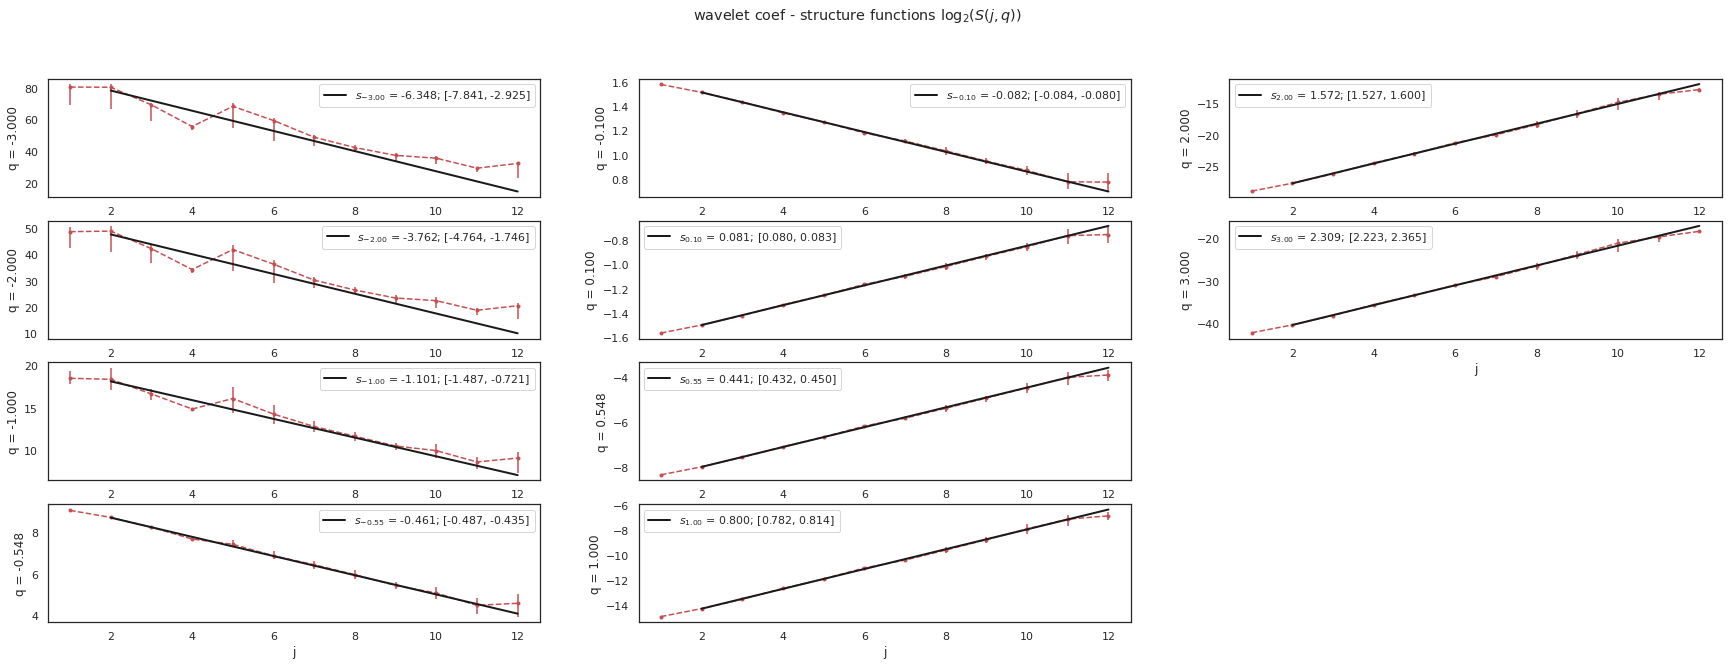

In [25]:
dwt.structure.plot(struct_boot=dwt_b.structure, figsize=(30, 10))

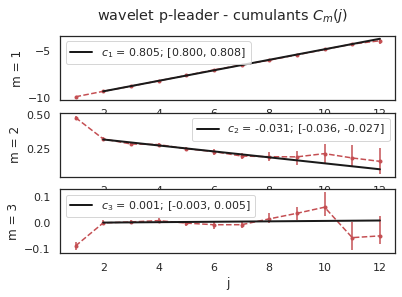

In [20]:
lwt.cumulants.plot(cm_boot=lwt_b.cumulants)

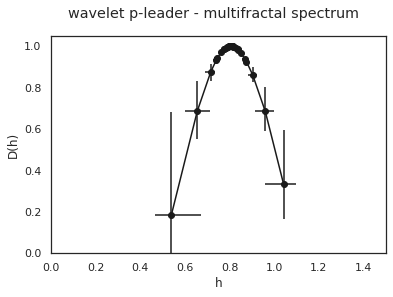

In [21]:
lwt.spectrum.plot(mfs_boot=lwt_b.spectrum)